import pandas as pd
import seaborn as sns
sns.set_context('paper')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#import pmdarima as pm
#from pmdarima.arima import auto_arima
import math
import warnings
warnings.filterwarnings('ignore')

In [109]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [110]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

font = {'family':'sans-serif',
        'weight':'bold',
        'size':18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (15, 8)

In [112]:
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv',parse_dates = ['Date'])
#pd.set_option('display.max_columns', None) 
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [113]:
#check for rows, columns
df.shape

(3019, 7)

In [114]:
pd.set_option('display.max_rows', None) 
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

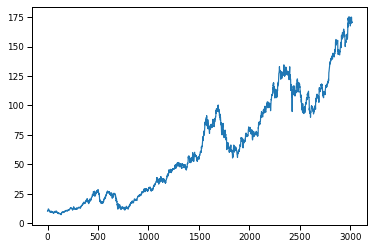

In [62]:
df.Open.plot();

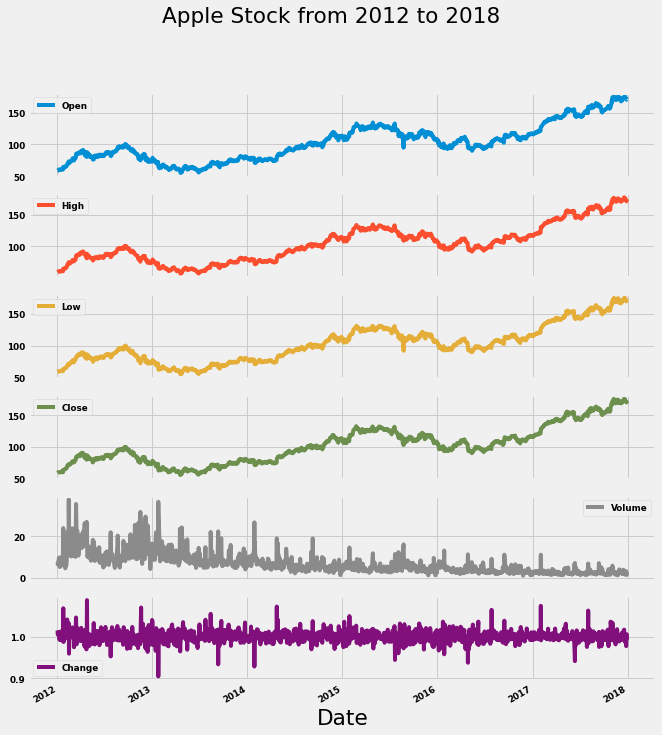

In [139]:
df['2012':'2018'].plot(subplots=True, figsize=(10,12), title="Apple Stock from 2012 to 2018")
plt.show()

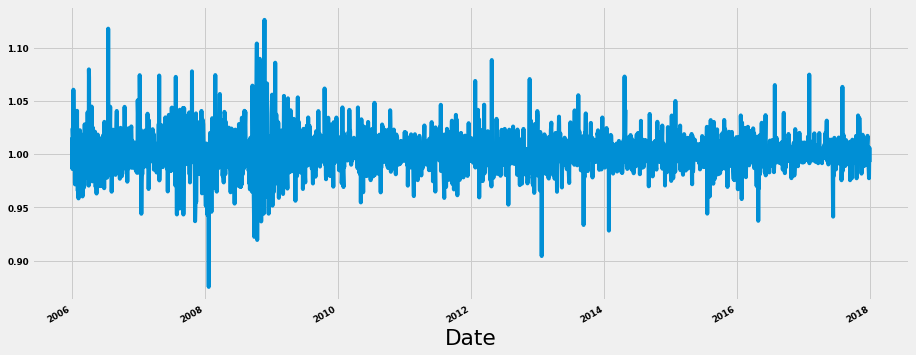

In [126]:
df['Change'] = df.High.div(df.High.shift())
df.Change.plot(figsize=(14,6));

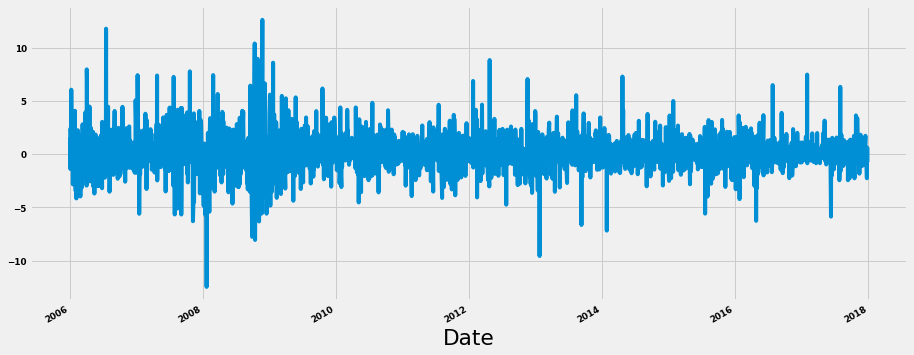

In [128]:
df.High.pct_change().mul(100).plot(figsize=(14,6));

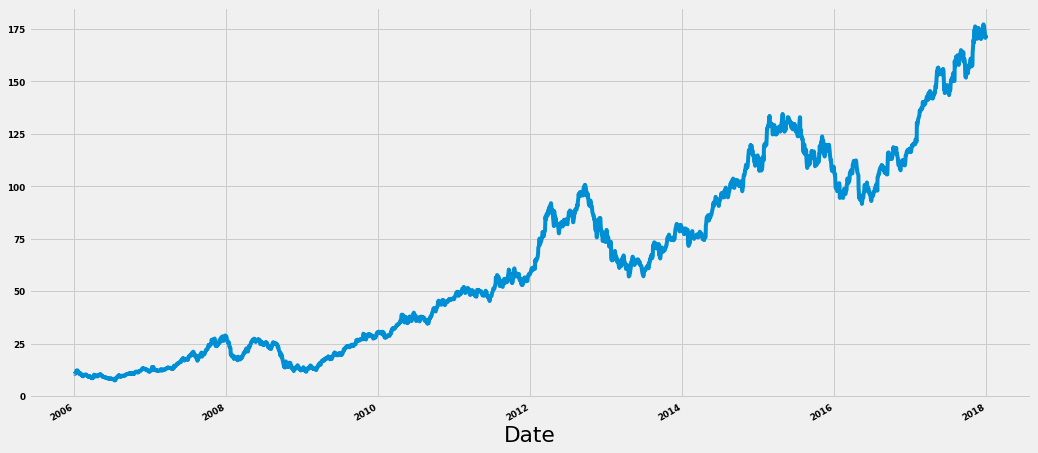

In [130]:
df["High"].plot(figsize=(16,8));

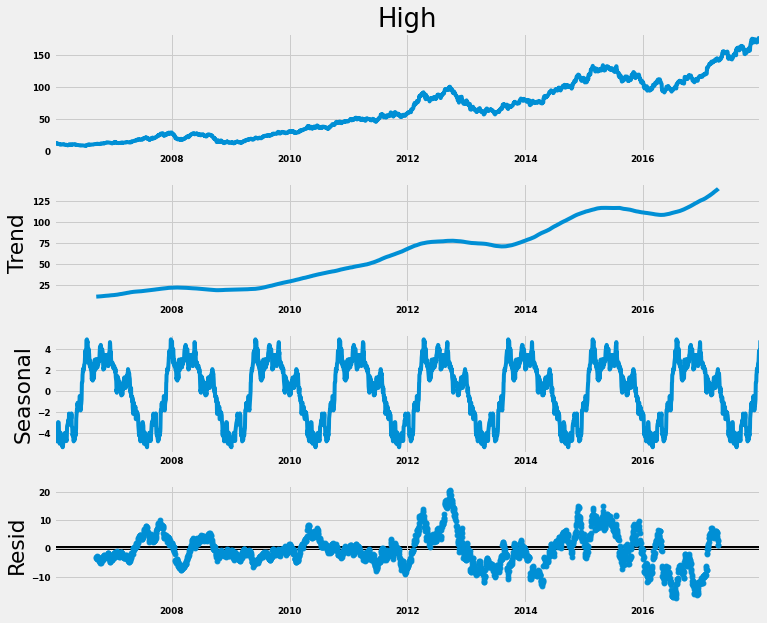

In [133]:
# Now, for decomposition
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposed_apple_volume = sm.tsa.seasonal_decompose(df["High"],freq=360) # The frequncy is annual
figure = decomposed_apple_volume.plot()
plt.show()

In [134]:
#upward trend
#seasonal uniform trend

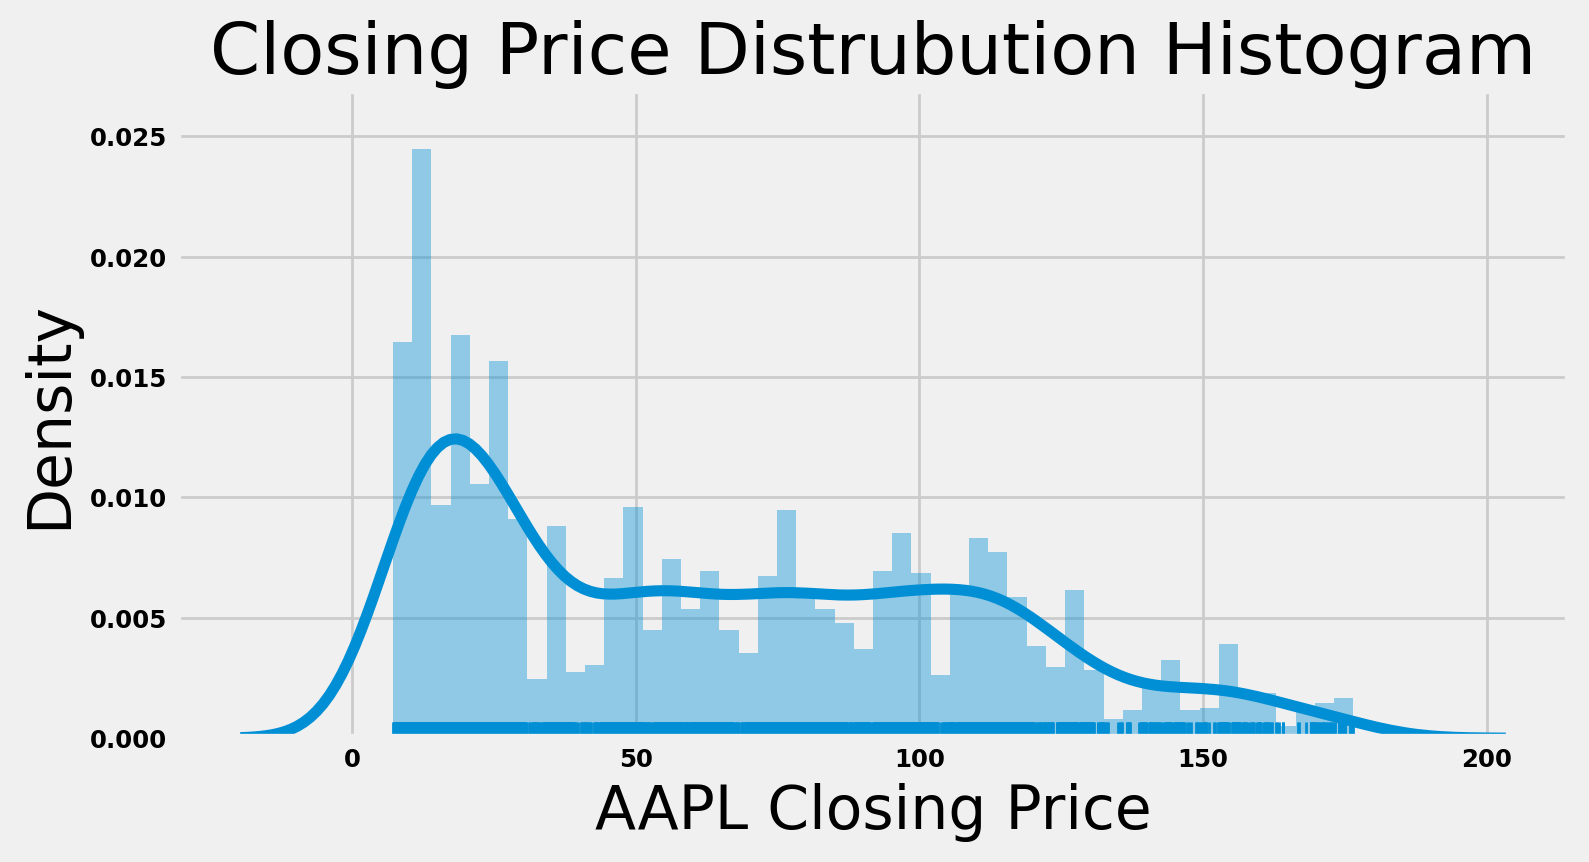

In [115]:
import seaborn as sns

ax1= plt.figure(figsize=[8,4], linewidth=0.5,dpi=200)
ax1 = sns.distplot(df['Close'].values,rug=True,bins=50)
ax1.set_title('Closing Price Distrubution Histogram')
ax1.set_xlabel('AAPL Closing Price')

plt.show()

There are no missing values so no need for cleaning

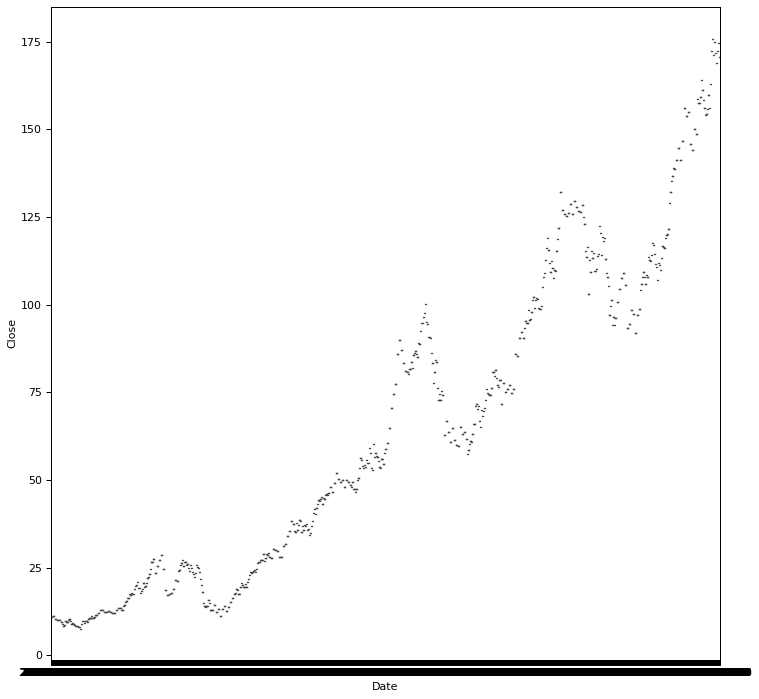

In [16]:
fig, ax = plt.subplots(figsize = (12,12))
sns.boxplot(x = 'Date', y = 'Close', data = df, ax = ax)
plt.xticks(fontsize = 11)
plt.xlabel('Date', fontsize = 11)
plt.ylabel('Close', fontsize = 11)
plt.yticks(fontsize = 11);

In [116]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [90]:
#appl = df[df['Name'] == "AAPL"]

In [89]:
#appl = appl.sort_values(by = 'Date')
#appl = appl.set_index('Date')
#appl['Returns'] = appl['Close'].pct_change()
#appl = appl.dropna()
#appl.head()

In [123]:
#(df.Date - df.Date[0])

In [118]:
df = df.copy()
df.set_index('Date', inplace = True)
#reindex = df.reindex(dates)
df['Volume'] = df['Volume'] / 10 ** 7
roll_mean = df.Volume.rolling(100, min_periods=1).mean()
ewma = df.Volume.ewm(100).mean()

In [104]:
#roll_mean

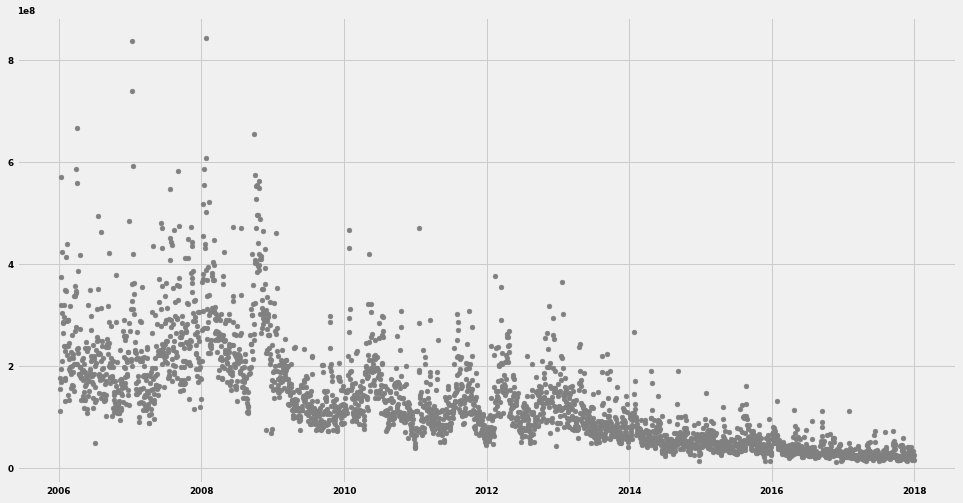

In [119]:
plt.scatter(appl.index, appl.Volume, color = 'grey');

Text(0.5, 0, 'Years')

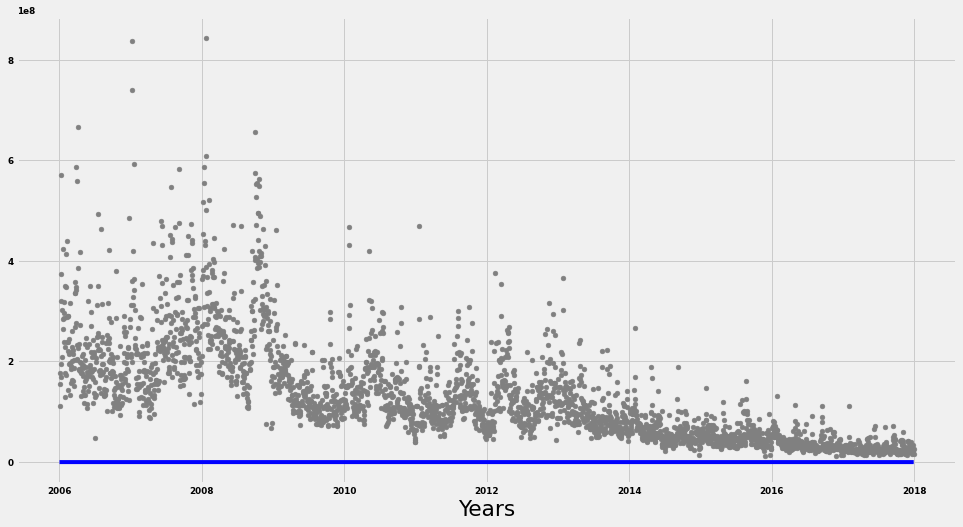

In [120]:
plt.scatter(appl.index, appl.Volume, color = 'grey')
plt.plot(roll_mean, color = 'blue')
plt.xlabel('Years')

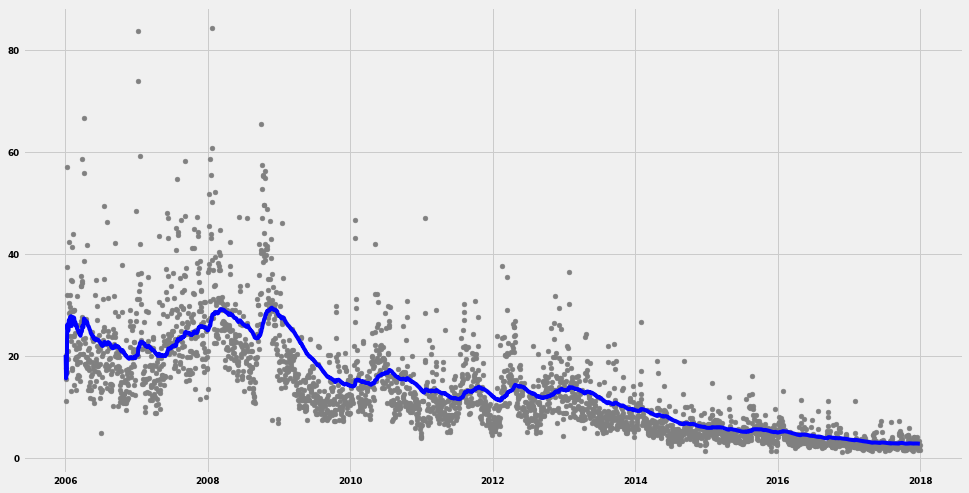

In [121]:
plt.scatter(df.index, df.Volume, color = 'grey')
plt.plot(ewma, color = 'blue')

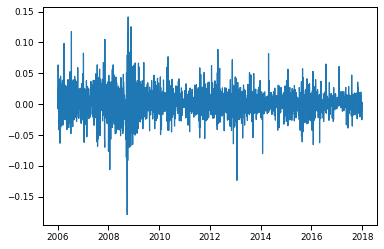

In [50]:
plt.plot(appl['Returns'])
plt.show()

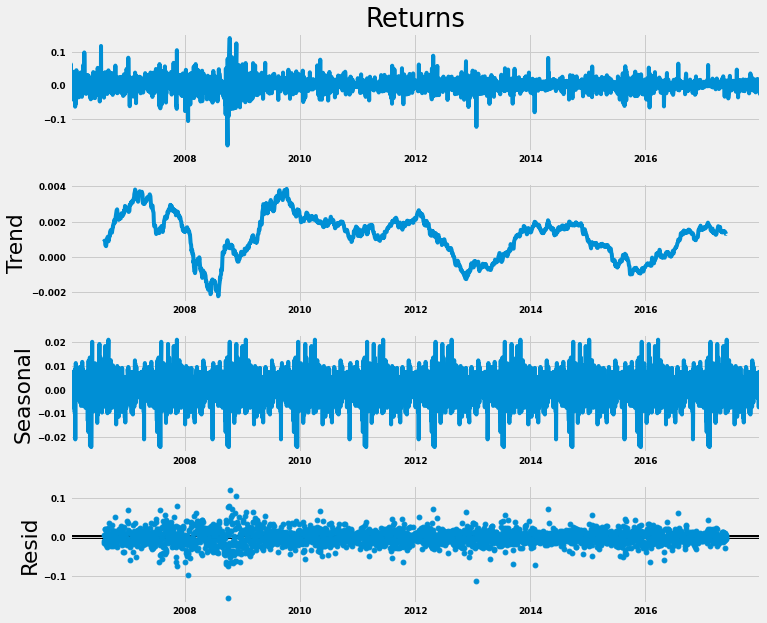

In [138]:
decomposition = seasonal_decompose(appl['Returns'], model='additive',freq = 300)
fig = decomposition.plot()
plt.show()

In [54]:
stat = adfuller(appl['Returns'])
print("The p-value obtained from the Dicky-Fuller Test is: ",stat[1])

The p-value obtained from the Dicky-Fuller Test is:  0.0


its now stationary

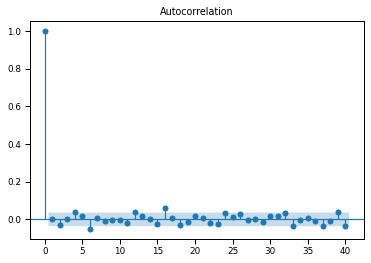

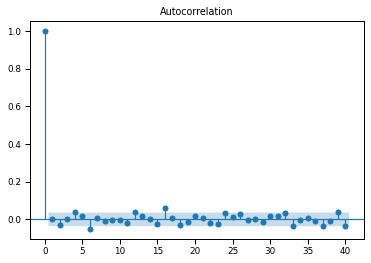

In [56]:
plot_acf(appl['Returns'],lags = 40)

# ARIMA Model

In [58]:
for i in range(9):
    model = ARMA(appl['Returns'],order= (i,i))
    result  = model.fit()
    print('At order=',i,', AIC = ',result.aic)

At order= 0 , AIC =  -14919.48197227898
At order= 1 , AIC =  -14916.5557234995
At order= 2 , AIC =  -14928.411796349712
At order= 3 , AIC =  -14911.383374111741
At order= 4 , AIC =  -14921.320173226934
At order= 5 , AIC =  -14926.331068426985
At order= 6 , AIC =  -14929.570311407584
At order= 7 , AIC =  -14926.810029370412
At order= 8 , AIC =  -14930.81659955988


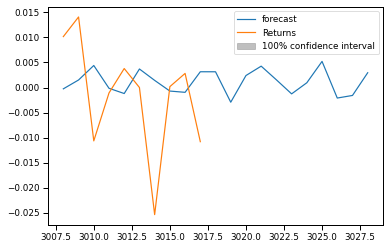

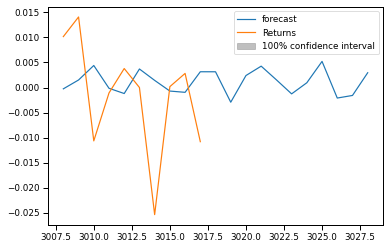

In [59]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)

In [25]:
df1 = df[['Date','Close']]
df1.head()

,Date,Close
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [28]:
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
            Close
Date             
2006-01-03  10.68
2006-01-04  10.71
2006-01-05  10.63
             Close
Date              
2017-12-27  170.60
2017-12-28  171.08
2017-12-29  169.23


In [135]:
#df_ts[df_ts.isnull()]

In [30]:
len(df_ts[df_ts.isnull()])

3019

In [31]:
df_ts = df_ts.sort_index()
df_ts.index

Index(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06', '2006-01-09',
       '2006-01-10', '2006-01-11', '2006-01-12', '2006-01-13', '2006-01-17',
       ...
       '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
       '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29'],
      dtype='object', name='Date', length=3019)

In [32]:
df_ts.Close.fillna(method='pad', inplace=True)

In [33]:
df_ts[df_ts.Close.isnull()]
len(df_ts[df_ts.Close.isnull()])

0

<AxesSubplot:xlabel='Date'>

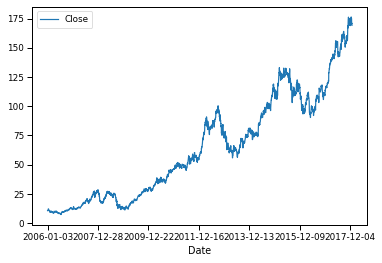

In [34]:
df_ts.plot()

In [35]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [36]:
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                    0.552367
p-value                           0.986381
#lags Used                       22.000000
Number of Observations Used    2996.000000
Critical Value (1%)              -3.432535
Critical Value (5%)              -2.862505
Critical Value (10%)             -2.567284
dtype: float64


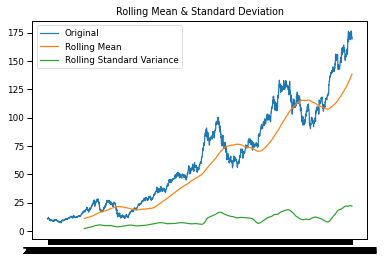

In [37]:
rolmean = ts.rolling(window=365).mean()
rolvar = ts.rolling(window=365).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)